In [82]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [83]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
from keras.optimizers import SGD

In [84]:
#CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 32
IMG_WIDTH = 32
CHANNELS = 3
NUM_CLASSES = 10

# **ResNET**

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
#load data
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [87]:
train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0

# **Splitting data in train - validation - test**

In [88]:
#train_x, validation_x, train_y, validation_y = train_test_split(train_x, train_y, test_size=0.10, random_state=42)

In [89]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(train_x, train_y, batch_size=64)
steps = int(train_x.shape[0] / 64)

In [90]:
print("train_size = ", train_x.shape)
print("test_size = ", test_x.shape)
#print("validation_size = ", validation_x.shape)

train_size =  (50000, 32, 32, 3)
test_size =  (10000, 32, 32, 3)


In [91]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [93]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [94]:
import tensorflow.keras.backend as K
# K.set_image_data_format('channels_last')
# K.set_learning_phase(1)

In [95]:
# model = tf.keras.applications.ResNet50(
#     include_top=False,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=(IMG_HEIGHT,IMG_WIDTH,CHANNELS),
#     pooling=None,
#     classes=NUM_CLASSES,
#    # classifier_activation="softmax",
# #    **kwargs
# )

In [96]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\tmcle\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_23 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [98]:
epochs = 100

#compila e treina o modelo com os dados carregados
#new_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer=adam)
model_trained = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_x, test_y), verbose=1)
#model_trained = new_model.fit(train_x, train_y,epochs=epochs,verbose=1,validation_data=(validation_x, validation_y),shuffle=False)

Epoch 1/100
781/781 [==============================] - 24s 29ms/step - loss: 2.1123 - accuracy: 0.0882 - val_loss: 1.5503 - val_accuracy: 0.0456
Epoch 2/100
781/781 [==============================] - 23s 30ms/step - loss: 1.5992 - accuracy: 0.0865 - val_loss: 1.4847 - val_accuracy: 0.0435
Epoch 3/100
781/781 [==============================] - 22s 29ms/step - loss: 1.4805 - accuracy: 0.0921 - val_loss: 1.4528 - val_accuracy: 0.0513
Epoch 4/100
781/781 [==============================] - 23s 30ms/step - loss: 1.4056 - accuracy: 0.0924 - val_loss: 1.5068 - val_accuracy: 0.0364
Epoch 5/100
781/781 [==============================] - 23s 29ms/step - loss: 1.3434 - accuracy: 0.0952 - val_loss: 1.4668 - val_accuracy: 0.0524
Epoch 6/100
781/781 [==============================] - 23s 29ms/step - loss: 1.2924 - accuracy: 0.0949 - val_loss: 1.4034 - val_accuracy: 0.0303
Epoch 7/100
781/781 [==============================] - 23s 29ms/step - loss: 1.2412 - accuracy: 0.0975 - val_loss: 1.2434 - val_ac

781/781 [==============================] - 23s 30ms/step - loss: 0.6650 - accuracy: 0.1015 - val_loss: 0.6134 - val_accuracy: 0.0893
Epoch 58/100
781/781 [==============================] - 22s 29ms/step - loss: 0.6663 - accuracy: 0.1017 - val_loss: 0.6429 - val_accuracy: 0.0859
Epoch 59/100
781/781 [==============================] - 22s 29ms/step - loss: 0.6576 - accuracy: 0.1020 - val_loss: 0.6504 - val_accuracy: 0.1028
Epoch 60/100
781/781 [==============================] - 23s 30ms/step - loss: 0.6548 - accuracy: 0.1016 - val_loss: 0.5834 - val_accuracy: 0.0968
Epoch 61/100
781/781 [==============================] - 23s 29ms/step - loss: 0.6512 - accuracy: 0.1019 - val_loss: 0.5884 - val_accuracy: 0.0916
Epoch 62/100
781/781 [==============================] - 22s 29ms/step - loss: 0.6487 - accuracy: 0.1022 - val_loss: 0.6700 - val_accuracy: 0.0878
Epoch 63/100
781/781 [==============================] - 22s 29ms/step - loss: 0.6428 - accuracy: 0.1017 - val_loss: 0.5854 - val_accuracy

In [99]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_23 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [100]:
def getLayerIndexByName(model, layername):
    for idx, layer in enumerate(model.layers):
        if layer.name == layername:
            return idx

In [101]:
print(getLayerIndexByName(model, 'flatten_1')) #just used to get the index of flatten layer

None


In [102]:
model_name = f'cifat10-resnet50-baseline-holdout-{epochs}epochs_normalized.npy'
model.save(model_name)

INFO:tensorflow:Assets written to: cifat10-resnet50-baseline-holdout-100epochs_normalized.npy\assets


INFO:tensorflow:Assets written to: cifat10-resnet50-baseline-holdout-100epochs_normalized.npy\assets


# **Random Forest - flatting**

In [103]:
new_model_rf = keras.Model(inputs=model.input, outputs=model.get_layer(index=18).output)
featureVector = new_model_rf.predict(train_x)

1563/1563 [==============================] - 5s 3ms/step


In [104]:
featureVector2 = new_model_rf.predict(test_x)

313/313 [==============================] - 1s 3ms/step


In [105]:
print(featureVector.shape)

(50000, 2048)


In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(featureVector,train_y)



C:\Users\tmcle\.conda\envs\tf\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [108]:
test_x.shape

(10000, 32, 32, 3)

In [109]:
y_pred=clf.predict(featureVector2)

In [110]:
featureVector.shape

(50000, 2048)

In [111]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.8157


In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
clf = DecisionTreeClassifier(random_state=0)

# **Testes**

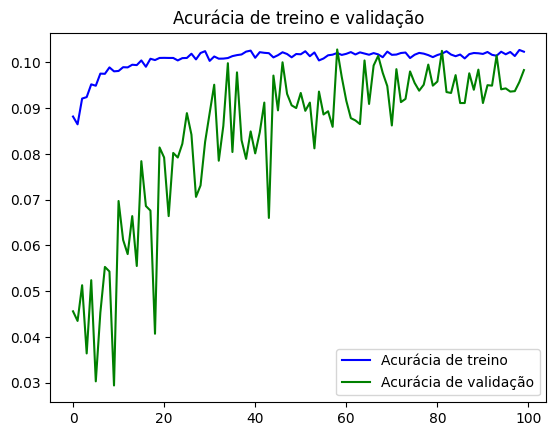

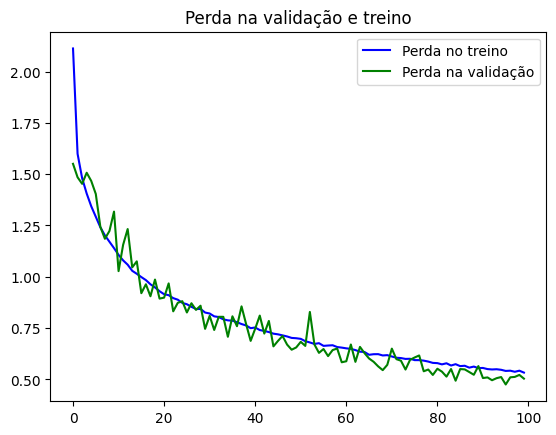

In [114]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['accuracy']
val_accuracy = model_trained.history['val_accuracy']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

In [115]:
#avalia a fase de teste

model_loss, model_accuracy = model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.5037 - accuracy: 0.0983
Test loss: 0.5036939382553101
Test accuracy: 0.09830000251531601


In [116]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [118]:
cm = confusion_matrix(test_y, pred_probs)

In [119]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)

F1 Score: 0.8271414182019562
Sensitivity: [0.843 0.949 0.687 0.631 0.835 0.677 0.963 0.881 0.92  0.907]
Specificity: [0.98444444 0.987      0.98722222 0.97833333 0.97655556 0.98644444
 0.94711111 0.98655556 0.988      0.98866667]
Precision:   [0.85757884 0.8902439  0.85660848 0.76392252 0.79827916 0.84730914
 0.66921473 0.87924152 0.89494163 0.89890981]
Accuracy:    [0.9703 0.9832 0.9572 0.9436 0.9624 0.9555 0.9487 0.976  0.9812 0.9805]
